# 2 Linear classification

## 1. Generative model (LDA)

__(c)__ Maximum Likelihood Entropy for the model

In [3]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline

In [4]:
# specify the colors
import matplotlib
alpha = 0.3
colors = [
    (0.7, 0.0, 0.0, alpha),  # red
    (0, 0, 0.7, alpha),  # blue    
]
cmap = matplotlib.colors.ListedColormap(colors)

In [3]:
data = np.genfromtxt('data/classificationA.train', delimiter='')

# select coord of pts belonging to class 0
class0 = data[data[:, 2] == 0][:, (0,1)]

# select coord of pts belonging to class 1
class1 = data[data[:, 2] == 1][:, (0,1)]

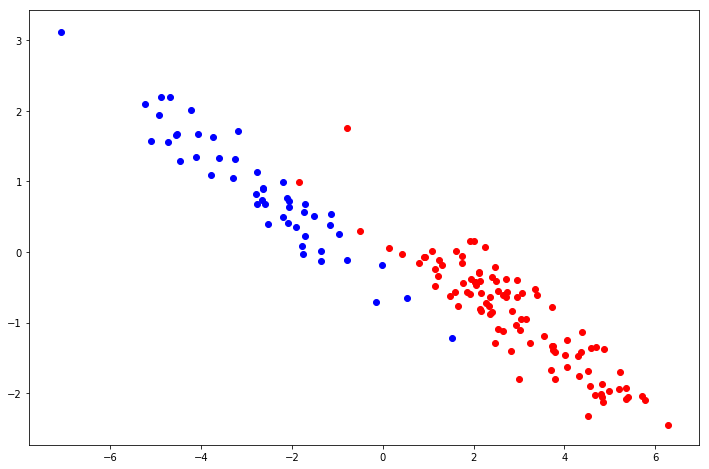

In [4]:
# plot the data from classificationA
fig = plt.figure(figsize=(12,8))
plt.scatter(class0[:, 0], class0[:, 1], c="r")
plt.scatter(class1[:, 0], class1[:, 1], c="b")
plt.show()

In [5]:
def lda_train(data):
    # select coord of pts belonging to class 0
    class0 = data[data[:, 2] == 0][:, (0,1)]

    # select coord of pts belonging to class 1
    class1 = data[data[:, 2] == 1][:, (0,1)]
    
    # compute paramaters for model
    mu0 = np.mean(class0, axis=0)
    mu1 = np.mean(class1, axis=0)

    sigma0 = (class0 - mu0).T.dot(class0 - mu0) / len(class0)
    sigma1 = (class1 - mu1).T.dot(class1 - mu1) / len(class1)

    sigma = (sigma0 * len(class0) + sigma1 * len(class1)) / len(data)

    pi = len(class1)/len(data)
    
    # compute p(y = 1 | x) = sigma(beta.T.dot(x) + gamma)
    beta = np.linalg.inv(sigma).dot(mu1 - mu0)
    gamma = - np.log((1-pi)/pi) - 0.5 * (mu1.T.dot(np.linalg.inv(sigma)).dot(mu1) - mu0.T.dot(np.linalg.inv(sigma)).dot(mu0))
    
    print("beta: ", beta)
    print("gamma: ", gamma)
    
    beta = np.append(beta, gamma)
    return beta

In [6]:
beta = lda_train(data)

beta:  [-6.62245258 -9.3462503 ]
gamma:  -0.136496290948


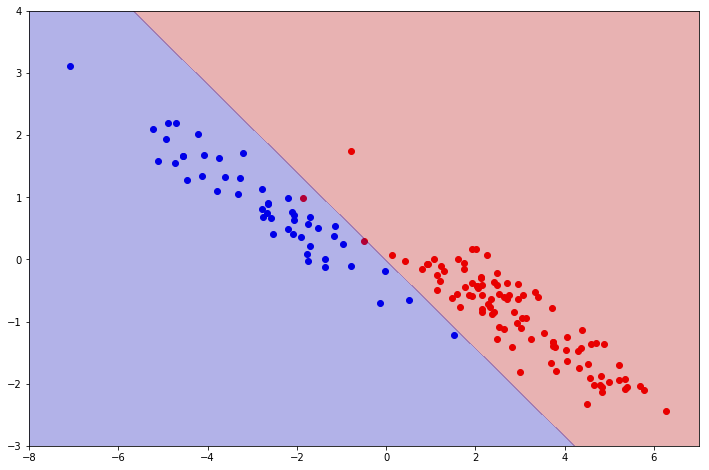

In [7]:
# p(y = 1 | x) = 0.5 iff 
# sigma(beta.T.dot(x) + gamma) = 0.5 iff
# beta.T.dot(x) + gamma = 0
fig = plt.figure(figsize=(12,8))
ax = fig.add_subplot(111)

# select coord of pts belonging to class 0
class0 = data[data[:, 2] == 0][:, (0,1)]

# select coord of pts belonging to class 1
class1 = data[data[:, 2] == 1][:, (0,1)]

x, y = np.linspace(-8,7,100), np.linspace(-3,4,100)
X, Y = np.meshgrid(x,y)
Z = beta[0]*X + beta[1]*Y + beta[2]

plt.scatter(class0[:, 0], class0[:, 1], c="r")
plt.scatter(class1[:, 0], class1[:, 1], c="b")
plt.contourf(X, Y, Z, 0, cmap=cmap)
plt.show()

## 2. Logistic regression

In [8]:
data = np.genfromtxt('data/classificationC.train', delimiter='')

# separate the data and add one to x to account for the offset
def process_data(data):
    Y = data[:, 2]
    X = np.array(data, copy=True)
    X[:, 2] = 1    
    return X, Y

# import sigmoid (expit) function
from scipy.special import expit

# see p2-7
def logistic_train(data, iter=100):
    X, Y = process_data(data)
    p = X.shape[1] # number of weights
    w = np.random.rand(p) * 0.1
    
    for i in range(iter):        
        eta = expit(X.dot(w))
        dl = X.T.dot(Y - eta)
        diag = np.diag(eta*(1-eta))
        hl = -X.T.dot(diag).dot(X)
        
        # update weights
        w = w - np.linalg.solve(hl,dl)
    return w

w_log = logistic_train(data)

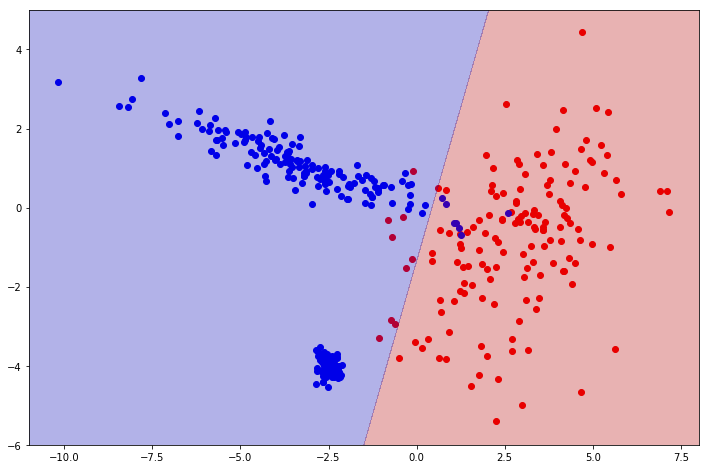

number of pts : 400
beta1 : -2.20323239693
beta2 : 0.709265621318
gamma : 0.959188854105


In [9]:
fig = plt.figure(figsize=(12,8))
ax = fig.add_subplot(111)

# select coord of pts belonging to class 0
class0 = data[data[:, 2] == 0][:, (0,1)]

# select coord of pts belonging to class 1
class1 = data[data[:, 2] == 1][:, (0,1)]

x, y = np.linspace(-11,8,100), np.linspace(-6,5,100)
X, Y = np.meshgrid(x,y)
Z = w_log[0]*X + w_log[1]*Y + w_log[2]

plt.scatter(class0[:, 0], class0[:, 1], c="r")
plt.scatter(class1[:, 0], class1[:, 1], c="b")
plt.contourf(X, Y, Z, 0, cmap=cmap)
plt.show()

print("number of pts :", len(data))
print("beta1 :", w_log[0])
print("beta2 :", w_log[1])
print("gamma :", w_log[2])

## 3. Linear regression

In [10]:
data = np.genfromtxt('data/classificationC.train', delimiter='')

def linear_train(data):
    X, Y = process_data(data)
    return np.linalg.inv(X.T.dot(X)).dot(X.T).dot(Y)

In [11]:
w_lin = linear_train(data)

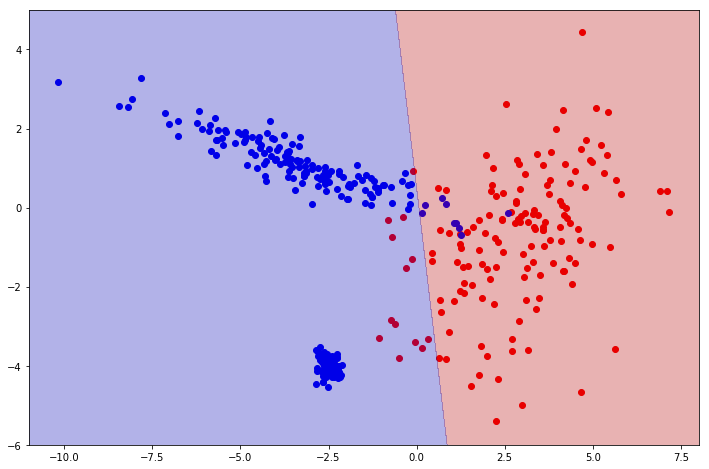

number of pts : 400
beta1 : -0.127693330499
beta2 : -0.0170014214318
gamma : 0.00839981582635


In [12]:
fig = plt.figure(figsize=(12,8))
ax = fig.add_subplot(111)

# select coord of pts belonging to class 0
class0 = data[data[:, 2] == 0][:, (0,1)]

# select coord of pts belonging to class 1
class1 = data[data[:, 2] == 1][:, (0,1)]

x, y = np.linspace(-11,8,100), np.linspace(-6,5,100)
X, Y = np.meshgrid(x,y)
Z = w_lin[0]*X + w_lin[1]*Y + w_lin[2] - 0.5

plt.scatter(class0[:, 0], class0[:, 1], c="r")
plt.scatter(class1[:, 0], class1[:, 1], c="b")
plt.contourf(X, Y, Z, 0, cmap=cmap)
plt.show()

print("number of pts :", len(data))
print("beta1 :", w_lin[0])
print("beta2 :", w_lin[1])
print("gamma :", w_lin[2] - 0.5)

## 4. Testing the models

In [13]:
# number of points misclassified
# for linear regression the threshold is 0.5
# for the others models the threshold is 0
def getError(data, beta, threshold):
    X, Y = process_data(data)
    Ypred = (X.dot(beta) >= threshold)
    return np.mean(Ypred != Y) * 100

In [14]:
ds = [
    'data/classificationA',
    'data/classificationB',
    'data/classificationC'
]

ds_type = ['train', 'test']

classifiers = {'LDA': lda_train,
               'Linear Regression': linear_train,
               'Logistic Regression': logistic_train
              }

for data in ds:
    for cl, fct in classifiers.items():
        for data_type in ds_type:
            dset = np.genfromtxt(data + '.' + data_type, delimiter='')
            
            # we need not compute Beta over the testing set !!
            beta = fct(dset) if data_type == "train" else beta
            err = getError(dset, beta, 0.5 if 'Li' in cl else 0)
            print(cl, "error on", data_type + "ing dataset", data[-1:], ": ", err)
        print("\n")

beta:  [-6.62245258 -9.3462503 ]
gamma:  -0.136496290948
LDA error on training dataset A :  1.33333333333
LDA error on testing dataset A :  2.0


Linear Regression error on training dataset A :  1.33333333333
Linear Regression error on testing dataset A :  2.06666666667


Logistic Regression error on training dataset A :  0.0
Logistic Regression error on testing dataset A :  3.53333333333


beta:  [-1.92108197  0.95442836]
gamma:  0.000929288716541
LDA error on training dataset B :  3.0
LDA error on testing dataset B :  4.15


Linear Regression error on training dataset B :  3.0
Linear Regression error on testing dataset B :  4.15


Logistic Regression error on training dataset B :  2.0
Logistic Regression error on testing dataset B :  4.3


beta:  [-2.05129911 -0.27311529]
gamma:  0.112429132177
LDA error on training dataset C :  5.5
LDA error on testing dataset C :  4.23333333333


Linear Regression error on training dataset C :  5.5
Linear Regression error on testing dataset C :  4.

## 5 QDA model

In [5]:
data = np.genfromtxt('data/classificationA.train', delimiter='')

def qda_train(data):
    # select coord of pts belonging to class 0
    class0 = data[data[:, 2] == 0][:, (0,1)]

    # select coord of pts belonging to class 1
    class1 = data[data[:, 2] == 1][:, (0,1)]
    
    # compute paramaters for model
    mu0 = np.mean(class0, axis=0)
    mu1 = np.mean(class1, axis=0)

    sigma0 = (class0 - mu0).T.dot(class0 - mu0) / len(class0)
    sigma1 = (class1 - mu1).T.dot(class1 - mu1) / len(class1)

    # number of point belonging to class1
    pi = len(class1)/len(data)
    
    inv_sigma1 = np.linalg.inv(sigma1)
    inv_sigma0 = np.linalg.inv(sigma0)

    Q = -(inv_sigma1 - inv_sigma0)
    beta = -(mu0.dot(inv_sigma0) - mu1.dot(inv_sigma1))
    gamma = -0.5 * ( mu1.T.dot(inv_sigma1).dot(mu1) - mu0.T.dot(inv_sigma0).dot(mu0) + \
                   np.log(np.linalg.det(sigma1)) - np.log(np.linalg.det(sigma0)) ) - np.log((1-pi)/pi)
    
    return Q, beta, gamma

Q, beta, gamma = qda_train(data)

Q:  [[-1.51744039 -3.0272297 ]
 [-3.0272297  -5.72332675]]
beta:  [ -7.36527314 -10.87335416]
gamma:  -0.626271453018


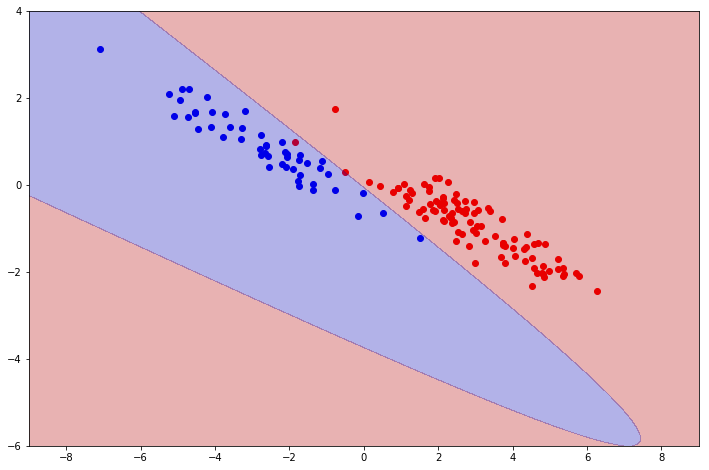

In [6]:
fig = plt.figure(figsize=(12,8))
ax = fig.add_subplot(111)

class0 = data[data[:, 2] == 0][:, (0,1)]
class1 = data[data[:, 2] == 1][:, (0,1)]

x, y = np.linspace(-9,9,100), np.linspace(-6,4,100)
X, Y = np.meshgrid(x,y)
Z = 0.5 *(Q[0][0]*X*X + Q[1][1]*Y*Y + 2*Q[0][1]*X*Y) + beta[0]*X + beta[1]*Y + gamma # Q[0][1] = Q[1][0]

plt.scatter(class0[:, 0], class0[:, 1], c="r")
plt.scatter(class1[:, 0], class1[:, 1], c="b")
plt.contourf(X, Y, Z, 0, cmap=cmap)

print("Q: ", Q)
print("beta: ", beta)
print("gamma: ", gamma)

plt.show()

In [7]:
def getErrorQDA(data, Q, beta, gamma):
    Y = data[:, 2]
    X = data[:, (0,1)]
    Ypred = (0.5*np.diag(X.dot(Q).dot(X.T)) + X.dot(beta) + gamma  >= 0)
    return np.mean(Ypred != Y) * 100

ds = [
    'data/classificationA',
    'data/classificationB',
    'data/classificationC'
]

ds_type = ['train', 'test']

classifiers = {'QDA': qda_train}

for data in ds:
    for cl, fct in classifiers.items():
        for data_type in ds_type:
            dset = np.genfromtxt(data + '.' + data_type, delimiter='')
            
            # we need not compute Beta over the testing set !!
            Q, beta, gamma = fct(dset) if data_type == "train" else (Q, beta, gamma)
            err = getErrorQDA(dset, Q, beta, gamma)
            print(cl, "error on", data_type + "ing dataset", data[-1:], ": ", err)
        print("\n")

QDA error on training dataset A :  0.666666666667
QDA error on testing dataset A :  2.0


QDA error on training dataset B :  1.33333333333
QDA error on testing dataset B :  2.0


QDA error on training dataset C :  5.25
QDA error on testing dataset C :  3.83333333333




### Conclusion:
This homework was interesting. Yet, I spent too much time on the report (I'm quite new to LaTeX). I've copied and pasted all the parameters with great accuracy in the report so you can verify easily the correctness of the result. My code is far from being perfect. actually I've realized I should have used OOP paradigm and create functions such as train and predict (as it is done in scikit-learn).